# 🍔 McDonald's Nutrition Analysis (EDA)

## 1. Introduction
In this project, we perform an **Exploratory Data Analysis (EDA)** on McDonald's menu nutrional dataset. With the rising awareness of diet and health, understanding what we eat is crucial

**Objective**
1. Identify the most caloric items on the menu
2. Analyze the distribution of menu categories
3. Examine cholesterol levels across different food categories
4. Visualize the correlation between different nutrients (Fat, Sugar, Protein, ect.).

**Tools used:** Python, Pandas, Matplotlib

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('menu.csv')

df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,260,9,Coffee & Tea,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,260,260,McFlurry with Reese's Peanut Butter Cups (Snack),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Serving Size,260,107,16 fl oz cup,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,260.0,NaN,NaN,NaN,368.269231,240.269886,0.0,210.0,340.0,500.0,1880.0
Calories from Fat,260.0,NaN,NaN,NaN,127.096154,127.875914,0.0,20.0,100.0,200.0,1060.0
Total Fat,260.0,NaN,NaN,NaN,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,NaN,NaN,NaN,21.815385,21.885199,0.0,3.75,17.0,35.0,182.0
Saturated Fat,260.0,NaN,NaN,NaN,6.007692,5.321873,0.0,1.0,5.0,10.0,20.0
Saturated Fat (% Daily Value),260.0,NaN,NaN,NaN,29.965385,26.639209,0.0,4.75,24.0,48.0,102.0
Trans Fat,260.0,NaN,NaN,NaN,0.203846,0.429133,0.0,0.0,0.0,0.0,2.5


## 2. Data Preparation & Cleaning


In [64]:
def get_grams_no_regex(value):
    if 'g)' in value:
        parts = value.split('(')
        last_part = parts[-1]
        number_part = last_part.replace('g)','')
        return float(number_part)
    return None

df['Serving Size (g)'] = df['Serving Size'].apply(get_grams_no_regex)

df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size (g)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,136.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,135.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,111.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,161.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,27,1,4,64,12,15,0,40,8,285.0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,35,1,5,85,15,20,0,50,10,381.0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,18,1,2,43,8,10,0,25,6,190.0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,38,2,9,103,21,20,0,60,6,403.0


In [8]:
missing = df.isna().sum()

missing

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [9]:

df.nunique().sort_values()

Trans Fat                          5
Dietary Fiber                      8
Category                           9
Iron (% Daily Value)              12
Calcium (% Daily Value)           16
Vitamin C (% Daily Value)         17
Vitamin A (% Daily Value)         19
Dietary Fiber (% Daily Value)     24
Saturated Fat                     26
Cholesterol                       35
Carbohydrates (% Daily Value)     40
Protein                           42
Calories from Fat                 48
Cholesterol (% Daily Value)       48
Total Fat                         52
Total Fat (% Daily Value)         63
Sodium (% Daily Value)            65
Saturated Fat (% Daily Value)     74
Calories                          78
Sugars                            83
Carbohydrates                     84
Serving Size                     107
Sodium                           111
Item                             260
dtype: int64

**How many items are there in each Category?**

In [10]:
category_count = df['Category'].value_counts() #value_counts to count unique values in a column
category_count

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

**List the top 10 items with the most sugars**

In [14]:
df.sort_values('Sugars', ascending = False).head(10)[['Item', 'Sugars']]


,Item,Sugars
253,McFlurry with M&M’s Candies (Medium),128
246,Strawberry Shake (Large),123
249,Chocolate Shake (Large),120
251,Shamrock Shake (Large),115
258,McFlurry with Reese's Peanut Butter Cups (Medium),103
243,Vanilla Shake (Large),101
245,Strawberry Shake (Medium),100
231,Frappé Chocolate Chip (Large),99
248,Chocolate Shake (Medium),97
250,Shamrock Shake (Medium),93


**How many dishes contain absolutely no sugar (Sugars = 0)?**

In [22]:
no_sugar = df[df['Sugars'] == 0]['Item']
print("There are", (len(no_sugar)), "dishes with no sugar.")

There are 25 dishes with no sugar.


**list all the dishes in the desert category**


In [26]:
desserts = df[df['Category'] == 'Desserts']
desserts


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
103,Desserts,Baked Apple Pie,2.7 oz (77 g),250,110,13.0,19,7.0,35,0.0,...,32,11,4,15,13,2,4,25,2,6
104,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,70,8.0,12,3.5,19,0.0,...,21,7,1,3,15,2,2,0,2,8
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,50,6.0,9,2.5,13,0.0,...,22,7,1,3,13,2,2,0,2,6
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,10,1.5,2,1.0,4,0.0,...,7,2,0,0,6,1,2,0,4,0
107,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,80,9.0,14,7.0,34,0.0,...,53,18,1,3,48,8,8,0,25,8
108,Desserts,Hot Caramel Sundae,6.4 oz (182 g),340,70,8.0,12,5.0,24,0.0,...,60,20,0,0,43,7,10,0,25,0
109,Desserts,Strawberry Sundae,6.3 oz (178 g),280,60,6.0,10,4.0,20,0.0,...,49,16,0,0,45,6,8,4,20,0


**Which food contains the most vitamin C**

In [36]:
vitaminc = df['Vitamin C (% Daily Value)'].max()
df[df['Vitamin C (% Daily Value)'] == vitaminc][['Item','Vitamin C (% Daily Value)']]

,Item,Vitamin C (% Daily Value)
135,Minute Maid Orange Juice (Large),240


**How many dishes are 'high in protein' (Protein > 20g) but 'low in fat' (Total fat < 10g)?**

In [42]:

df[(df['Total Fat'] <= 10) & (df['Protein'] >= 20)
][['Item','Protein','Total Fat']]

,Item,Protein,Total Fat
58,Premium Grilled Chicken Classic Sandwich,28,9.0
77,Premium McWrap Chicken Sweet Chili (Grilled Ch...,27,10.0
86,Premium Bacon Ranch Salad with Grilled Chicken,29,8.0
89,Premium Southwest Salad with Grilled Chicken,27,8.0


**How many dishes have a higher protein content than total fat content?**

In [49]:
more_protein = df[(df['Protein'] > df['Total Fat'])]

print(f"The number of dishes with more protein than fat is {len(more_protein)}.")


The number of dishes with more protein than fat is 101.


## 4. Visualization
### 4.1 The "Calorie Bomb" Alert 🚨
First, we want to identify which items contribute the most to daily calorie intake We filtered items containing
**more than 800** calories

Text(0, 0.5, 'Item Name')

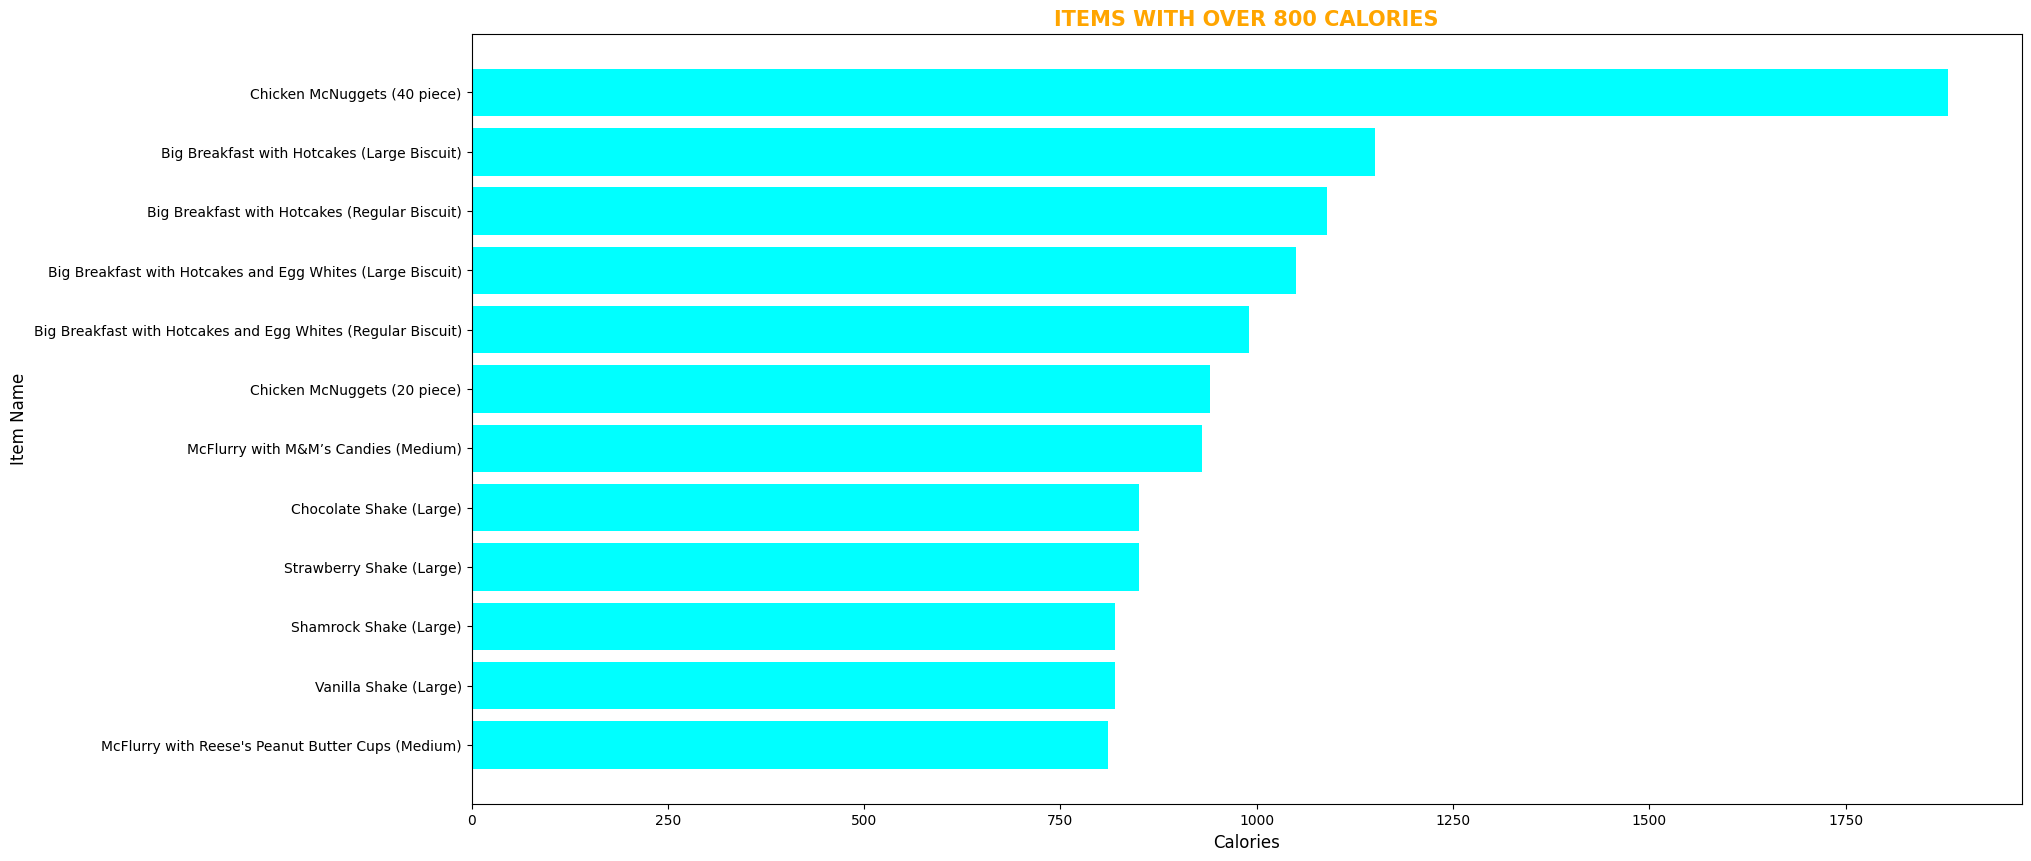

In [65]:
kcal = df[(df['Calories'] > 800)].sort_values('Calories',ascending=True)

plt.figure(figsize = (20, 10))
plt.barh(kcal['Item'],kcal['Calories'],color = 'cyan')
plt.title('ITEMS WITH OVER 800 CALORIES',fontsize = 15, fontweight = 'bold', color = 'orange')
plt.xlabel('Calories', fontsize = 12)
plt.ylabel('Item Name', fontsize = 12)

**Observation:**
- The **Chicken McNuggets (40 pieces)** is the highest calorie item (1800 kcal).
- Most high-calorie items belong to the **Breakfast** category (Big Breakfasts).

---

### 4.2. Menu Category Distribution
What does McDonald's mainly sell? Let's look at the distribution of items across different categories.

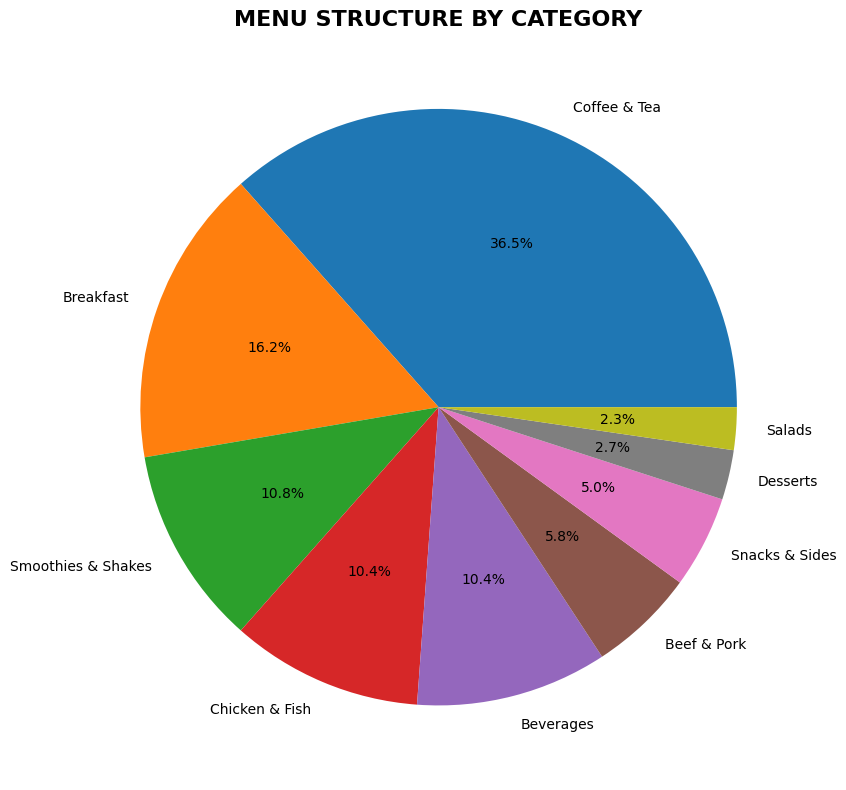

In [90]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(category_counts, labels=category_counts.index, autopct = '%1.1f%%')
plt.title('MENU STRUCTURE BY CATEGORY', fontsize = 16, fontweight = 'bold', color='black')
plt.tight_layout()
plt.show()

**Observation**
- **Coffee & Tea** is the largest cateogory (36.5%), followed by **Breakfast** (16.2%).
- Salads make up the smallest portion of the menu (2.3%).

### 4.3. Cholesterol Analysis by Category
Which category is the least heart-friendly? We calculate the average cholesterol per category.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

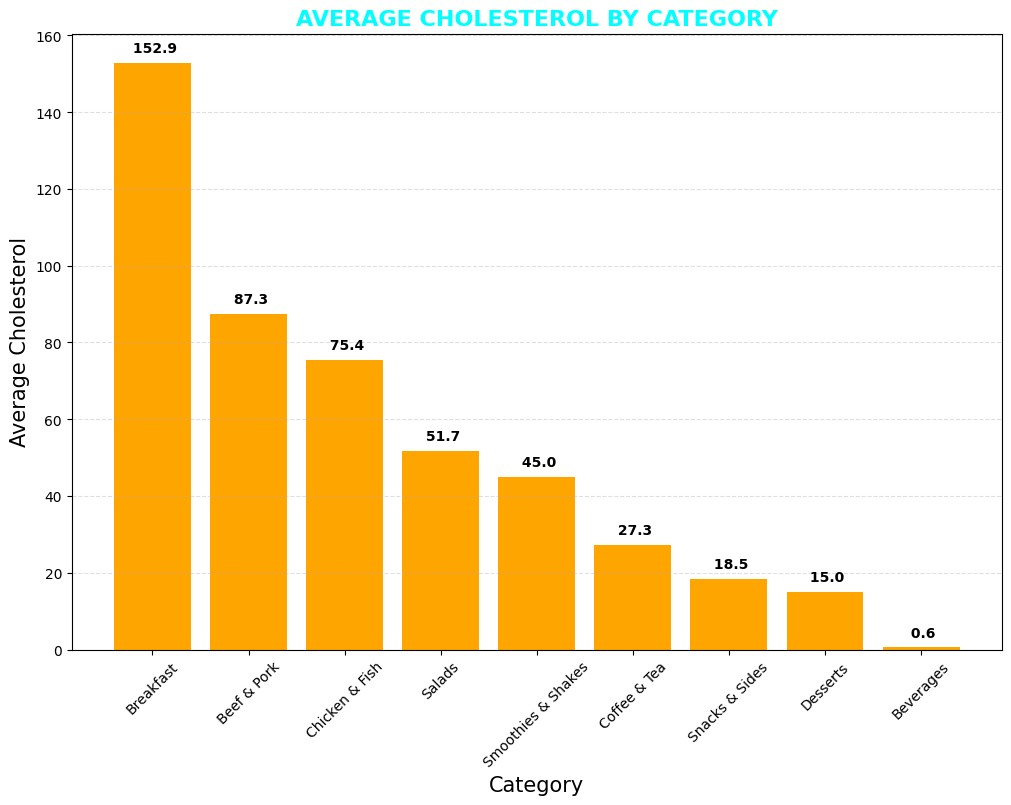

In [91]:
avg_cholesterol = df.groupby('Category')['Cholesterol'].mean().sort_values(ascending=False)

plt.figure(figsize = (12,8))
plt.grid(axis = 'y', linestyle = '--', alpha = 0.4)

bars = plt.bar(avg_cholesterol.index,avg_cholesterol.values,color = 'orange')
plt.title('ITEMS WITH OVER 800 CALORIES',fontsize = 0, fontweight = 'bold', color = 'black')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Average Cholesterol',fontsize = 15)
plt.title('AVERAGE CHOLESTEROL BY CATEGORY', fontsize = 16, fontweight = 'bold', color = 'cyan')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height: .1f}', ha='center', va='bottom', fontsize = 10, fontweight = 'bold')

plt.tight_layout

**Observation:**
- **Breakfast** iteams have significantly higher cholesterol (avg 152.8 mg) compared to other categories, likely due to eggs and sausages/
- **Beverages** have the lowest cholesterol (almost 0).


## 5. Conclusion & Key Takeaways

1. **Calories:** The menu has some extremely high-calorie items, particularly in the breakfast section and large Chicken Mc Nuggets buckets.
2. **Menu Mix:** McDonald's focuses heavily on Coffee & Tea and Breakfast, attempting to capture the morning crowd.
3. **Health Implications:** - **Breakfast** is the category with the highest Cholesterol levels.

this analysis helps consumers make informed decisions when choosing their meals based on their dietary goal (e.g.,low cholesterol or low sugar)